In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
Cars = pd.read_csv("Car details v3.csv ")

In [3]:
Cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
Cars.shape

(8128, 13)

In [5]:
Cars.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [6]:
Cars.isnull().sum()/len(Cars)

name             0.000000
year             0.000000
selling_price    0.000000
km_driven        0.000000
fuel             0.000000
seller_type      0.000000
transmission     0.000000
owner            0.000000
mileage          0.027190
engine           0.027190
max_power        0.026452
torque           0.027313
seats            0.027190
dtype: float64

In [7]:
Cars.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object

In [8]:
Cars["car_brands"] = Cars["name"].apply(lambda x : x.lower().split(" ")[0])

In [9]:
Cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,car_brands
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,maruti
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,skoda
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,honda
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,hyundai
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,maruti


In [10]:
Cars["seller_type"].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [11]:
Cars["mileage"].unique()

array(['23.4 kmpl', '21.14 kmpl', '17.7 kmpl', '23.0 kmpl', '16.1 kmpl',
       '20.14 kmpl', '17.3 km/kg', '23.59 kmpl', '20.0 kmpl',
       '19.01 kmpl', '17.3 kmpl', '19.3 kmpl', nan, '18.9 kmpl',
       '18.15 kmpl', '24.52 kmpl', '19.7 kmpl', '22.54 kmpl', '21.0 kmpl',
       '25.5 kmpl', '26.59 kmpl', '21.5 kmpl', '20.3 kmpl', '21.4 kmpl',
       '24.7 kmpl', '18.2 kmpl', '16.8 kmpl', '24.3 kmpl', '14.0 kmpl',
       '18.6 kmpl', '33.44 km/kg', '23.95 kmpl', '17.0 kmpl',
       '20.63 kmpl', '13.93 kmpl', '16.0 kmpl', '17.8 kmpl', '18.5 kmpl',
       '12.55 kmpl', '12.99 kmpl', '14.8 kmpl', '13.5 kmpl', '26.0 kmpl',
       '20.65 kmpl', '27.3 kmpl', '11.36 kmpl', '17.68 kmpl',
       '14.28 kmpl', '18.53 kmpl', '14.84 kmpl', '21.12 kmpl',
       '20.36 kmpl', '21.27 kmpl', '18.16 kmpl', '22.0 kmpl', '25.1 kmpl',
       '20.51 kmpl', '21.66 kmpl', '25.2 kmpl', '22.9 kmpl', '16.02 kmpl',
       '20.54 kmpl', '22.77 kmpl', '15.71 kmpl', '23.1 kmpl',
       '19.02 kmpl', '19.81 kmpl'

In [12]:
Cars["mileage"] = Cars["mileage"].apply(lambda x : float(str(x).split(" ")[0]))

In [13]:
Cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,car_brands
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,maruti
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,skoda
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,honda
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,hyundai
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,maruti


In [14]:
Cars["engine"].unique()

array(['1248 CC', '1498 CC', '1497 CC', '1396 CC', '1298 CC', '1197 CC',
       '1061 CC', '796 CC', '1364 CC', '1399 CC', '1461 CC', '993 CC',
       nan, '1198 CC', '1199 CC', '998 CC', '1591 CC', '2179 CC',
       '1368 CC', '2982 CC', '2494 CC', '2143 CC', '2477 CC', '1462 CC',
       '2755 CC', '1968 CC', '1798 CC', '1196 CC', '1373 CC', '1598 CC',
       '1998 CC', '1086 CC', '1194 CC', '1172 CC', '1405 CC', '1582 CC',
       '999 CC', '2487 CC', '1999 CC', '3604 CC', '2987 CC', '1995 CC',
       '1451 CC', '1969 CC', '2967 CC', '2497 CC', '1797 CC', '1991 CC',
       '2362 CC', '1493 CC', '1599 CC', '1341 CC', '1794 CC', '799 CC',
       '1193 CC', '2696 CC', '1495 CC', '1186 CC', '1047 CC', '2498 CC',
       '2956 CC', '2523 CC', '1120 CC', '624 CC', '1496 CC', '1984 CC',
       '2354 CC', '814 CC', '793 CC', '1799 CC', '936 CC', '1956 CC',
       '1997 CC', '1499 CC', '1948 CC', '2997 CC', '2489 CC', '2499 CC',
       '2609 CC', '2953 CC', '1150 CC', '1994 CC', '1388 CC', '152

In [15]:
Cars["engine"] = Cars["engine"].apply(lambda x : float(str(x).split(" ")[0]))
Cars["engine"] = Cars["engine"].fillna(Cars["engine"].mean())

In [16]:
Cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,car_brands
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74 bhp,190Nm@ 2000rpm,5.0,maruti
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52 bhp,250Nm@ 1500-2500rpm,5.0,skoda
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,honda
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90 bhp,22.4 kgm at 1750-2750rpm,5.0,hyundai
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,maruti


In [17]:
Cars["max_power"] = Cars["max_power"].apply(lambda x : float(str(x).split(" ")[0] if str(x).split(" ")[0] !="" else np.nan))

In [18]:
Cars["max_power"].unique()

array([ 74.   , 103.52 ,  78.   ,  90.   ,  88.2  ,  81.86 ,  57.5  ,
        37.   ,  67.1  ,  68.1  , 108.45 ,  60.   ,  73.9  ,     nan,
        67.   ,  82.   ,  88.5  ,  46.3  ,  88.73 ,  64.1  ,  98.6  ,
        88.8  ,  83.81 ,  83.1  ,  47.3  ,  73.8  ,  34.2  ,  35.   ,
        81.83 ,  40.3  , 121.3  , 138.03 , 160.77 , 117.3  , 116.3  ,
        83.14 ,  67.05 , 168.5  , 100.   , 120.7  ,  98.63 , 175.56 ,
       103.25 , 171.5  , 100.6  , 174.33 , 187.74 , 170.   ,  78.9  ,
        88.76 ,  86.8  , 108.495, 108.62 ,  93.7  , 103.6  ,  98.59 ,
       189.   ,  67.04 ,  68.05 ,  58.2  ,  82.85 ,  81.8  ,  73.   ,
       120.   ,  94.68 , 160.   ,  65.   , 155.   ,  69.01 , 126.32 ,
       138.1  ,  83.8  , 126.2  ,  98.96 ,  62.1  ,  86.7  , 188.   ,
       214.56 , 177.   , 280.   , 148.31 , 254.79 , 190.   , 177.46 ,
       204.   , 141.   , 117.6  , 241.4  , 282.   , 150.   , 147.5  ,
       108.5  , 103.5  , 183.   , 181.04 , 157.7  , 164.7  ,  91.1  ,
       400.   ,  68.

In [19]:
Cars["torque"].unique()

array(['190Nm@ 2000rpm', '250Nm@ 1500-2500rpm', '12.7@ 2,700(kgm@ rpm)',
       '22.4 kgm at 1750-2750rpm', '11.5@ 4,500(kgm@ rpm)',
       '113.75nm@ 4000rpm', '7.8@ 4,500(kgm@ rpm)', '59Nm@ 2500rpm',
       '170Nm@ 1800-2400rpm', '160Nm@ 2000rpm', '248Nm@ 2250rpm',
       '78Nm@ 4500rpm', nan, '84Nm@ 3500rpm', '115Nm@ 3500-3600rpm',
       '200Nm@ 1750rpm', '62Nm@ 3000rpm', '219.7Nm@ 1500-2750rpm',
       '114Nm@ 3500rpm', '115Nm@ 4000rpm', '69Nm@ 3500rpm',
       '172.5Nm@ 1750rpm', '6.1kgm@ 3000rpm', '114.7Nm@ 4000rpm',
       '60Nm@ 3500rpm', '90Nm@ 3500rpm', '151Nm@ 4850rpm',
       '104Nm@ 4000rpm', '320Nm@ 1700-2700rpm', '250Nm@ 1750-2500rpm',
       '145Nm@ 4600rpm', '146Nm@ 4800rpm', '343Nm@ 1400-3400rpm',
       '200Nm@ 1400-3400rpm', '200Nm@ 1250-4000rpm',
       '400Nm@ 2000-2500rpm', '138Nm@ 4400rpm', '360Nm@ 1200-3400rpm',
       '200Nm@ 1200-3600rpm', '380Nm@ 1750-2500rpm', '173Nm@ 4000rpm',
       '400Nm@ 1750-3000rpm', '400Nm@ 1400-2800rpm',
       '200Nm@ 1750-3000rp

In [20]:
def converet(x):
    torq = ""
    rpm = ""
    if x != np.nan:
        x = str(x).lower().replace(",","")
        values = re.findall("[0-9.]+",x)
        if "nm" in x :
            torq = float(values[0])
            try:
                rpm = float(values[1])
            except:
                rpm = 1000
        elif 'kgm' in x:
            torq = float(values[0])*9.81
            rpm = float(values[1])
    else:
        torq = np.nan
        rpm = np.nan
    return torq,rpm

converet('51@ 1,750-3,000(kgm@ rpm)')

(500.31, 1750.0)

In [21]:
for i in Cars.index:
    torq,rpm = converet(Cars.loc[i,'torque'])
    Cars.loc[i,'torque'] = torq
    Cars.loc[i,'rpm'] = rpm

In [22]:
Cars['torque'] = pd.to_numeric(Cars['torque'])

In [23]:
Cars['rpm'] = pd.to_numeric(Cars['rpm'])

In [24]:
Cars.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
torque           float64
seats            float64
car_brands        object
rpm              float64
dtype: object

In [25]:
owner_mapping= {}
for i,j in enumerate(Cars['owner'].unique()):
    owner_mapping[j] = -1*(i+1)

In [26]:
owner_mapping['Second Owner']

-2

In [27]:
Cars['owner']  = Cars['owner'].apply(lambda x: owner_mapping[x])

In [28]:
corr = Cars.corr()

<AxesSubplot:>

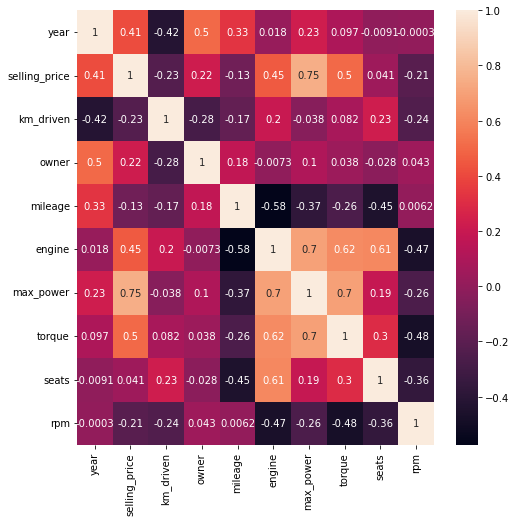

In [29]:
plt.figure(figsize=(8,8))
sns.heatmap(corr,annot=True)

In [30]:
pd.get_dummies(Cars['fuel'],drop_first=True)

,Diesel,LPG,Petrol
0,1,0,0
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
8123,0,0,1
8124,1,0,0
8125,1,0,0
8126,1,0,0


In [31]:
cars = Cars.drop('name',axis=1)

In [33]:
cars = pd.get_dummies(cars)

In [34]:
cars.columns

Index(['year', 'selling_price', 'km_driven', 'owner', 'mileage', 'engine',
       'max_power', 'torque', 'seats', 'rpm', 'fuel_CNG', 'fuel_Diesel',
       'fuel_LPG', 'fuel_Petrol', 'seller_type_Dealer',
       'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'transmission_Automatic', 'transmission_Manual',
       'car_brands_ambassador', 'car_brands_ashok', 'car_brands_audi',
       'car_brands_bmw', 'car_brands_chevrolet', 'car_brands_daewoo',
       'car_brands_datsun', 'car_brands_fiat', 'car_brands_force',
       'car_brands_ford', 'car_brands_honda', 'car_brands_hyundai',
       'car_brands_isuzu', 'car_brands_jaguar', 'car_brands_jeep',
       'car_brands_kia', 'car_brands_land', 'car_brands_lexus',
       'car_brands_mahindra', 'car_brands_maruti', 'car_brands_mercedes-benz',
       'car_brands_mg', 'car_brands_mitsubishi', 'car_brands_nissan',
       'car_brands_opel', 'car_brands_peugeot', 'car_brands_renault',
       'car_brands_skoda', 'car_brands_tata', 'ca

In [36]:
for i in cars.columns:
    cars[i] = cars[i].fillna(cars[i].mean())

In [37]:
x = cars.drop('selling_price',axis=1)
y = cars.selling_price

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.feature_selection import RFE

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.1,random_state=1)

In [40]:
model = LinearRegression()
model.fit(x_train,y_train)
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)
rmse_train = np.sqrt(mean_squared_error(y_train,train_pred))
r2_train = r2_score(y_train,train_pred)
rmse_test = np.sqrt(mean_squared_error(y_test,test_pred))
r2_test= r2_score(y_test,test_pred)
print('Train Performance')
print(f'RMSE : {rmse_train}')
print(f'R2 : {r2_train}')
print('Test Performance')
print(f'RMSE : {rmse_test}')
print(f'R2 : {r2_test}')

Train Performance
RMSE : 323901.39427779644
R2 : 0.8450071442174758
Test Performance
RMSE : 245453.24959029237
R2 : 0.8508749516268214


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='selling_price', ylabel='Density'>

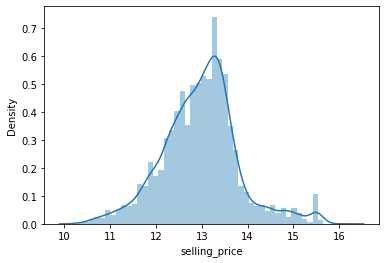

In [41]:
sns.distplot(y.apply(np.log))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 [Text(0, 0, 'year'),
  Text(1, 0, 'km_driven'),
  Text(2, 0, 'owner'),
  Text(3, 0, 'mileage'),
  Text(4, 0, 'engine'),
  Text(5, 0, 'max_power'),
  Text(6, 0, 'torque'),
  Text(7, 0, 'seats'),
  Text(8, 0, 'rpm'),
  Text(9, 0, 'fuel_CNG'),
  Text(10, 0, 'fuel_Diesel'),
  Text(11, 0, 'fuel_LPG'),
  Text(12, 0, 'fuel_Petrol'),
  Text(13, 0, 'seller_type_Dealer'),
  Text(14, 0, 'seller_type_Individual'),
  Text(15, 0, 'seller_type_Trustmark Dealer'),
  Text(16, 0, 'transmission_Automatic'),
  Text(17, 0, 'transmission_Manual'),
  Text(18, 0, 'car_brands_ambassador'),
  Text(19, 0, 'car_brands_ashok'),
  Text(20, 0, 'car_brands_audi'),
  Text(21, 0, 'car_brands_bmw'),
  Text(22, 0, 'car_brands_chevrolet'),
  Text(23, 0, 'car_brands_daewoo'),
  Text(24, 0, 'car_brand

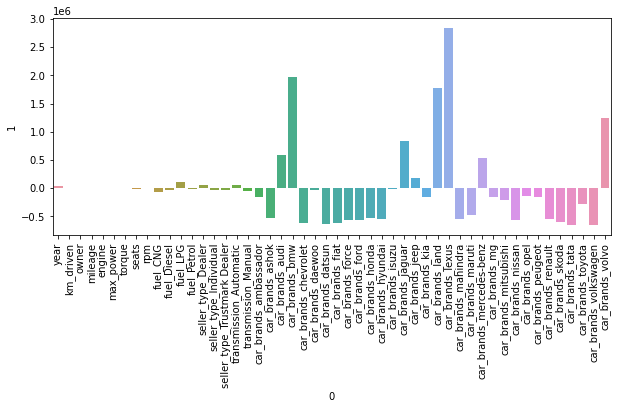

In [42]:
temp = pd.DataFrame(zip(x_train.columns,model.coef_))
plt.figure(figsize=(10,4))
sns.barplot(x=0,y=1,data=temp)
plt.xticks(rotation=90)

In [43]:
model = LinearRegression()
model.fit(x_train,y_train.apply(np.log))
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)
rmse_train = np.sqrt(mean_squared_error(y_train.apply(np.log),train_pred))
r2_train = r2_score(y_train.apply(np.log),train_pred)
rmse_test = np.sqrt(mean_squared_error(y_test.apply(np.log),test_pred))
r2_test= r2_score(y_test.apply(np.log),test_pred)
print('Train Performance')
print(f'RMSE : {rmse_train}')
print(f'R2 : {r2_train}')
print('Test Performance')
print(f'RMSE : {rmse_test}')
print(f'R2 : {r2_test}')

Train Performance
RMSE : 0.25580364188221927
R2 : 0.9081527016494785
Test Performance
RMSE : 0.25484320969679436
R2 : 0.8964730048490801


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 [Text(0, 0, 'year'),
  Text(1, 0, 'km_driven'),
  Text(2, 0, 'owner'),
  Text(3, 0, 'mileage'),
  Text(4, 0, 'engine'),
  Text(5, 0, 'max_power'),
  Text(6, 0, 'torque'),
  Text(7, 0, 'seats'),
  Text(8, 0, 'rpm'),
  Text(9, 0, 'fuel_CNG'),
  Text(10, 0, 'fuel_Diesel'),
  Text(11, 0, 'fuel_LPG'),
  Text(12, 0, 'fuel_Petrol'),
  Text(13, 0, 'seller_type_Dealer'),
  Text(14, 0, 'seller_type_Individual'),
  Text(15, 0, 'seller_type_Trustmark Dealer'),
  Text(16, 0, 'transmission_Automatic'),
  Text(17, 0, 'transmission_Manual'),
  Text(18, 0, 'car_brands_ambassador'),
  Text(19, 0, 'car_brands_ashok'),
  Text(20, 0, 'car_brands_audi'),
  Text(21, 0, 'car_brands_bmw'),
  Text(22, 0, 'car_brands_chevrolet'),
  Text(23, 0, 'car_brands_daewoo'),
  Text(24, 0, 'car_brand

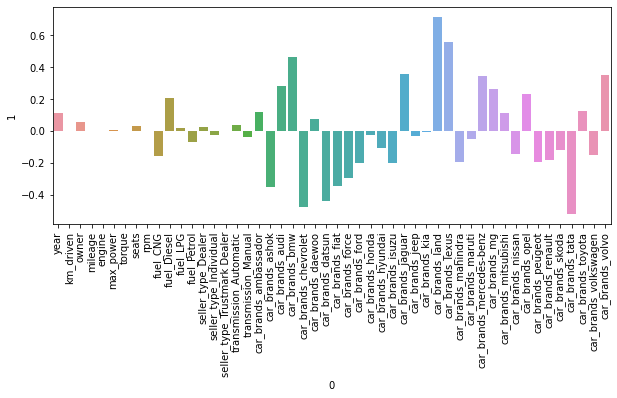

In [44]:
temp = pd.DataFrame(zip(x_train.columns,model.coef_))
plt.figure(figsize=(10,4))
sns.barplot(x=0,y=1,data=temp)
plt.xticks(rotation=90)

In [45]:
residuel = y_train.apply(np.log) - train_pred

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='selling_price'>

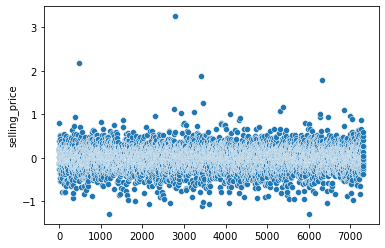

In [46]:
sns.scatterplot(range(len(y_train)),residuel)

In [47]:
temp =pd.DataFrame(zip(y_test,test_pred),columns = ['test','pred'])

In [48]:
temp['actual_pred'] = temp['pred'].apply(np.exp)

<AxesSubplot:xlabel='test', ylabel='actual_pred'>

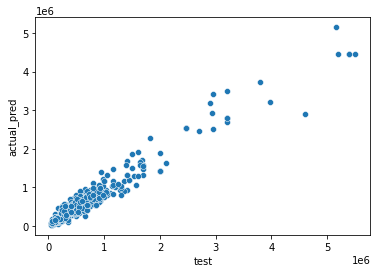

In [49]:
sns.scatterplot(x='test',y='actual_pred',data=temp)

In [50]:
np.sqrt(mean_squared_error(temp['test'],temp['actual_pred']))

160811.51431287036

In [51]:
## Coarse feature selection
rfe = RFE(LinearRegression(),n_features_to_select=30)
rfe.fit(x_train,y_train.apply(np.log))

RFE(estimator=LinearRegression(), n_features_to_select=30)

In [52]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [53]:
x_train_sm  = sm.add_constant(x_train)

C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [54]:
model = sm.OLS(y_train.apply(np.log),x_train_sm)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     1562.
Date:                Fri, 19 Aug 2022   Prob (F-statistic):               0.00
Time:                        19:06:02   Log-Likelihood:                -406.67
No. Observations:                7315   AIC:                             907.3
Df Residuals:                    7268   BIC:                             1232.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         -105.2173      1.015   -103.671      0.000    -107.207    -103.228
year                             0.1164      0.001    108.511      0.000       0.114       0.119
km_driven                    -3.689e-07   6.22e-08     -5.927      0.000   -4.91e-07   -2.47e-07
owner                            0.0546      0.005     11.171      0.000       0.045       0.064
mileage                         -0.0016      0.001     -1.179      0.238      -0.004       0.001
engine                           0.0002   1.57e-05     11.067      0.000       0.000       0.000
max_power                        0.0084      0.000     43.436      0.000       0.008       0.009
torque                          -0.0001   4.72e-05     -2.589      0.010      -0.000   -2.97e-05
seats                            0.0317      0.005      6.097      0.000       0.022       0.042
rpm                           8.499e-06   6.16e-06      1.380      0.168   -3.57e-06    2.06e-05
fuel_CNG                       -26.4625      0.256   -103.364      0.000     -26.964     -25.961
fuel_Diesel                    -26.0980      0.254   -102.552      0.000     -26.597     -25.599
fuel_LPG                       -26.2863      0.256   -102.810      0.000     -26.787     -25.785
fuel_Petrol                    -26.3705      0.254   -103.750      0.000     -26.869     -25.872
seller_type_Dealer             -35.0484      0.338   -103.593      0.000     -35.712     -34.385
seller_type_Individual         -35.0946      0.338   -103.905      0.000     -35.757     -34.432
seller_type_Trustmark Dealer   -35.0744      0.339   -103.378      0.000     -35.739     -34.409
transmission_Automatic         -52.5724      0.508   -103.451      0.000     -53.569     -51.576
transmission_Manual            -52.6449      0.507   -103.876      0.000     -53.638     -51.651
car_brands_ambassador           -3.1665      0.130    -24.438      0.000      -3.420      -2.912
car_brands_ashok                -3.6360      0.252    -14.427      0.000      -4.130      -3.142
car_brands_audi                 -3.0024      0.056    -53.746      0.000      -3.112      -2.893
car_brands_bmw                  -2.8234      0.045    -62.620      0.000      -2.912      -2.735
car_brands_chevrolet            -3.7662      0.041    -91.378      0.000      -3.847      -3.685
car_brands_daewoo               -3.2112      0.178    -18.025      0.000      -3.560      -2.862
car_brands_datsun               -3.7276      0.051    -72.703      0.000      -3.828      -3.627
car_brands_fiat                 -3.6336      0.053    -68.493      0.000      -3.738      -3.530
car_brands_force                -3.5810      0.110    -32.608      0.000      -3.796      -3.366
car_brands_ford                 -3.4852      0.040    -86.710      0.000    

In [55]:
model = sm.OLS(y_train.apply(np.log),x_train_sm)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     1562.
Date:                Fri, 19 Aug 2022   Prob (F-statistic):               0.00
Time:                        19:06:02   Log-Likelihood:                -406.67
No. Observations:                7315   AIC:                             907.3
Df Residuals:                    7268   BIC:                             1232.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         -105.2173      1.015   -103.671      0.000    -107.207    -103.228
year                             0.1164      0.001    108.511      0.000       0.114       0.119
km_driven                    -3.689e-07   6.22e-08     -5.927      0.000   -4.91e-07   -2.47e-07
owner                            0.0546      0.005     11.171      0.000       0.045       0.064
mileage                         -0.0016      0.001     -1.179      0.238      -0.004       0.001
engine                           0.0002   1.57e-05     11.067      0.000       0.000       0.000
max_power                        0.0084      0.000     43.436      0.000       0.008       0.009
torque                          -0.0001   4.72e-05     -2.589      0.010      -0.000   -2.97e-05
seats                            0.0317      0.005      6.097      0.000       0.022       0.042
rpm                           8.499e-06   6.16e-06      1.380      0.168   -3.57e-06    2.06e-05
fuel_CNG                       -26.4625      0.256   -103.364      0.000     -26.964     -25.961
fuel_Diesel                    -26.0980      0.254   -102.552      0.000     -26.597     -25.599
fuel_LPG                       -26.2863      0.256   -102.810      0.000     -26.787     -25.785
fuel_Petrol                    -26.3705      0.254   -103.750      0.000     -26.869     -25.872
seller_type_Dealer             -35.0484      0.338   -103.593      0.000     -35.712     -34.385
seller_type_Individual         -35.0946      0.338   -103.905      0.000     -35.757     -34.432
seller_type_Trustmark Dealer   -35.0744      0.339   -103.378      0.000     -35.739     -34.409
transmission_Automatic         -52.5724      0.508   -103.451      0.000     -53.569     -51.576
transmission_Manual            -52.6449      0.507   -103.876      0.000     -53.638     -51.651
car_brands_ambassador           -3.1665      0.130    -24.438      0.000      -3.420      -2.912
car_brands_ashok                -3.6360      0.252    -14.427      0.000      -4.130      -3.142
car_brands_audi                 -3.0024      0.056    -53.746      0.000      -3.112      -2.893
car_brands_bmw                  -2.8234      0.045    -62.620      0.000      -2.912      -2.735
car_brands_chevrolet            -3.7662      0.041    -91.378      0.000      -3.847      -3.685
car_brands_daewoo               -3.2112      0.178    -18.025      0.000      -3.560      -2.862
car_brands_datsun               -3.7276      0.051    -72.703      0.000      -3.828      -3.627
car_brands_fiat                 -3.6336      0.053    -68.493      0.000      -3.738      -3.530
car_brands_force                -3.5810      0.110    -32.608      0.000      -3.796      -3.366
car_brands_ford                 -3.4852      0.040    -86.710      0.000    

In [63]:
flag = 1
while flag == 1:
    vif = pd.DataFrame()
    vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
    vif['variable'] = x_train.columns
    vif = vif.sort_values('VIF',ascending=False)
    vif = vif.reset_index(drop=True)
    vif_value = vif.loc[0,'VIF']
    if vif_value >=5:
        var = vif['variable'][0]
        x_train = x_train.drop(var,axis=1)
        print(f'Dropping f{var} as vif = {vif_value}')
    else:
        flag=2


In [64]:
x_train_sm = sm.add_constant(x_train)

C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [65]:
model = sm.OLS(y_train.apply(np.log),x_train_sm)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     267.3
Date:                Fri, 19 Aug 2022   Prob (F-statistic):               0.00
Time:                        19:06:36   Log-Likelihood:                -6000.4
No. Observations:                7315   AIC:                         1.208e+04
Df Residuals:                    7277   BIC:                         1.234e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       12.8827      0.085    151.791      0.000      12.716      13.049
km_driven                 -3.63e-06   1.21e-07    -29.922      0.000   -3.87e-06   -3.39e-06
fuel_CNG                    -0.4339      0.079     -5.478      0.000      -0.589      -0.279
fuel_LPG                    -0.8177      0.100     -8.192      0.000      -1.013      -0.622
fuel_Petrol                 -0.5753      0.015    -37.434      0.000      -0.605      -0.545
seller_type_Dealer           0.2013      0.021      9.564      0.000       0.160       0.243
transmission_Automatic       0.5724      0.025     22.761      0.000       0.523       0.622
car_brands_ambassador       -0.9218      0.288     -3.200      0.001      -1.486      -0.357
car_brands_ashok             0.4548      0.558      0.816      0.415      -0.638       1.548
car_brands_audi              1.3512      0.125     10.773      0.000       1.105       1.597
car_brands_bmw               1.5673      0.103     15.282      0.000       1.366       1.768
car_brands_chevrolet        -0.0482      0.093     -0.520      0.603      -0.230       0.133
car_brands_daewoo           -0.9353      0.399     -2.346      0.019      -1.717      -0.154
car_brands_datsun            0.4177      0.110      3.784      0.000       0.201       0.634
car_brands_force             0.9269      0.240      3.858      0.000       0.456       1.398
car_brands_ford              0.4084      0.089      4.591      0.000       0.234       0.583
car_brands_honda             0.7634      0.089      8.617      0.000       0.590       0.937
car_brands_hyundai           0.5093      0.086      5.942      0.000       0.341       0.677
car_brands_isuzu             1.0826      0.330      3.280      0.001       0.436       1.729
car_brands_jaguar            1.3432      0.111     12.062      0.000       1.125       1.562
car_brands_jeep              1.7636      0.134     13.144      0.000       1.501       2.027
car_brands_kia               0.7632      0.289      2.642      0.008       0.197       1.329
car_brands_land              1.5312      0.242      6.332      0.000       1.057       2.005
car_brands_lexus             2.4460      0.131     18.632      0.000       2.189       2.703
car_brands_mahindra          0.6498      0.087      7.498      0.000       0.480       0.820
car_brands_maruti            0.3517      0.085      4.132      0.000       0.185       0.519
car_brands_mercedes-benz     1.3452      0.117     11.477      0.000       1.115       1.575
car_brands_mg                1.3566      0.331      4.105      0.000       0.709       2.004
car_brands_mitsubishi        0.6927      0.175      3.970      0.000       0.351       1.035
car_brands_nissan            0.4428      0.106      4.178      0.000       0.235       0.651
car_brands_ope

In [66]:
results.pvalues.sort_values(ascending=False).index[0]

'car_brands_chevrolet'

In [67]:
flag =1
while flag ==1:
    model = sm.OLS(y_train.apply(np.log),x_train_sm)
    results = model.fit()
    pvalues = results.pvalues.sort_values(ascending=False)
    max_pval = pvalues[0]
    max_col  = pvalues.index[0]
    if max_pval > 0.05:
        x_train_sm = x_train_sm.drop(max_col,axis=1)
    else:
        flag=2

In [68]:
x_train_sm.columns

Index(['const', 'km_driven', 'fuel_CNG', 'fuel_LPG', 'fuel_Petrol',
       'seller_type_Dealer', 'transmission_Automatic', 'car_brands_ambassador',
       'car_brands_audi', 'car_brands_bmw', 'car_brands_daewoo',
       'car_brands_datsun', 'car_brands_force', 'car_brands_ford',
       'car_brands_honda', 'car_brands_hyundai', 'car_brands_isuzu',
       'car_brands_jaguar', 'car_brands_jeep', 'car_brands_kia',
       'car_brands_land', 'car_brands_lexus', 'car_brands_mahindra',
       'car_brands_maruti', 'car_brands_mercedes-benz', 'car_brands_mg',
       'car_brands_mitsubishi', 'car_brands_nissan', 'car_brands_peugeot',
       'car_brands_renault', 'car_brands_skoda', 'car_brands_tata',
       'car_brands_toyota', 'car_brands_volkswagen', 'car_brands_volvo'],
      dtype='object')

In [69]:
model = sm.OLS(y_train.apply(np.log),x_train_sm)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     290.8
Date:                Fri, 19 Aug 2022   Prob (F-statistic):               0.00
Time:                        19:06:39   Log-Likelihood:                -6001.9
No. Observations:                7315   AIC:                         1.207e+04
Df Residuals:                    7280   BIC:                         1.232e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       12.8422      0.037    342.644      0.000      12.769      12.916
km_driven                -3.629e-06   1.21e-07    -29.924      0.000   -3.87e-06   -3.39e-06
fuel_CNG                    -0.4343      0.079     -5.484      0.000      -0.590      -0.279
fuel_LPG                    -0.8187      0.100     -8.203      0.000      -1.014      -0.623
fuel_Petrol                 -0.5761      0.015    -37.511      0.000      -0.606      -0.546
seller_type_Dealer           0.2013      0.021      9.563      0.000       0.160       0.243
transmission_Automatic       0.5725      0.025     22.766      0.000       0.523       0.622
car_brands_ambassador       -0.8814      0.278     -3.173      0.002      -1.426      -0.337
car_brands_audi              1.3916      0.100     13.984      0.000       1.197       1.587
car_brands_bmw               1.6077      0.069     23.450      0.000       1.473       1.742
car_brands_daewoo           -0.8942      0.391     -2.285      0.022      -1.661      -0.127
car_brands_datsun            0.4589      0.079      5.779      0.000       0.303       0.615
car_brands_force             0.9674      0.228      4.246      0.000       0.521       1.414
car_brands_ford              0.4490      0.046      9.825      0.000       0.359       0.539
car_brands_honda             0.8044      0.045     18.046      0.000       0.717       0.892
car_brands_hyundai           0.5501      0.039     14.247      0.000       0.474       0.626
car_brands_isuzu             1.1229      0.321      3.497      0.000       0.493       1.752
car_brands_jaguar            1.3836      0.081     17.050      0.000       1.224       1.543
car_brands_jeep              1.8043      0.110     16.358      0.000       1.588       2.021
car_brands_kia               0.8036      0.279      2.884      0.004       0.257       1.350
car_brands_land              1.5715      0.229      6.848      0.000       1.122       2.021
car_brands_lexus             2.4871      0.106     23.359      0.000       2.278       2.696
car_brands_mahindra          0.6903      0.041     16.709      0.000       0.609       0.771
car_brands_maruti            0.3926      0.037     10.534      0.000       0.320       0.466
car_brands_mercedes-benz     1.3858      0.089     15.592      0.000       1.212       1.560
car_brands_mg                1.3977      0.321      4.348      0.000       0.768       2.028
car_brands_mitsubishi        0.7331      0.157      4.669      0.000       0.425       1.041
car_brands_nissan            0.4835      0.073      6.579      0.000       0.339       0.628
car_brands_peugeot          -1.4922      0.552     -2.703      0.007      -2.575      -0.410
car_brands_renault           0.5955      0.053     11.334      0.000       0.493       0.699
car_brands_sko

In [70]:
np.exp(np.sqrt(results.mse_model))

12035.014252162246

In [71]:
x_train_sm.head()

,const,km_driven,fuel_CNG,fuel_LPG,fuel_Petrol,seller_type_Dealer,transmission_Automatic,car_brands_ambassador,car_brands_audi,car_brands_bmw,...,car_brands_mg,car_brands_mitsubishi,car_brands_nissan,car_brands_peugeot,car_brands_renault,car_brands_skoda,car_brands_tata,car_brands_toyota,car_brands_volkswagen,car_brands_volvo
1882,1.0,70000,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2851,1.0,25000,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3722,1.0,50000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1657,1.0,29000,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3461,1.0,80000,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
train_pred = results.predict(x_train_sm)

In [73]:
x_test_sm = sm.add_constant(x_test)

C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [74]:
x_test_sm = x_test_sm[x_train_sm.columns]

In [75]:
np.sqrt(mean_squared_error(y_train,train_pred.apply(np.exp)))

388612.9453379136

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='selling_price'>

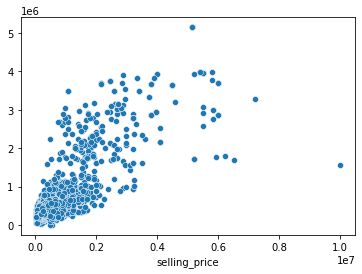

In [76]:
sns.scatterplot(y_train,train_pred.apply(np.exp))

In [77]:
import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.losses import *
from tensorflow.keras.optimizers import *
import warnings
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings('ignore')
from tensorflow.keras.utils import plot_model

In [78]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.1,random_state=1)

In [79]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)

In [80]:
model = Sequential()
model.add(InputLayer(input_shape=(x_train.shape[1],)))
model.add(Dense(1,activation='linear'))

In [81]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


In [82]:
model.compile(optimizer = SGD(lr=0.01),loss=MeanAbsoluteError(),
             metrics = ['mean_squared_error'])

In [83]:
history = model.fit(x_train_scaled,y_train,epochs = 120
                )

Epoch 1/120
229/229 [==============================] - 1s 2ms/step - loss: 644726.8750 - mean_squared_error: 1092556816384.0000
Epoch 2/120
229/229 [==============================] - 0s 1ms/step - loss: 644714.8125 - mean_squared_error: 1092541874176.0000
Epoch 3/120
229/229 [==============================] - 0s 1ms/step - loss: 644702.7500 - mean_squared_error: 1092526342144.0000
Epoch 4/120
229/229 [==============================] - 0s 1ms/step - loss: 644690.4375 - mean_squared_error: 1092511924224.0000
Epoch 5/120
229/229 [==============================] - 0s 1ms/step - loss: 644678.1250 - mean_squared_error: 1092496392192.0000
Epoch 6/120
229/229 [==============================] - 0s 1ms/step - loss: 644665.8750 - mean_squared_error: 1092481515520.0000
Epoch 7/120
229/229 [==============================] - 0s 1ms/step - loss: 644653.8750 - mean_squared_error: 1092466311168.0000
Epoch 8/120
229/229 [==============================] - 0s 1ms/step - loss: 644641.4375 - mean_squared_er

In [87]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [95]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3,random_state =1 )
model = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(model,parameters, cv=10)
grid.fit(X_train, y_train)
print ("r2 / variance : ", grid.best_score_)
print("Residual sum of squares: %.2f"
% np.mean((grid.predict(X_test) - y_test) ** 2))

r2 / variance :  0.8343667338175914
Residual sum of squares: 91165050891.48
